Hello
This is the Jupiter notebook that would be used for my final assignment in IBM Data Science course series on Coursera.


#Introduction 
##Credit Card Fraud detection
The number of credit card owners is projected close to overpass 1 billion by 2022. To ensure security of credit card transactions, it is essential to monitor fraudulent activities. Credit card companies shall be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
A credit card dataset contains a mix of fraud as well as non-fraudulent transactions and the target is to predict if a given test transaction is fraudulent or not.

In [6]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Dataset
The datasets contains transactions samples made by credit cards in September 2013 by European cardholders (file creditcard.csv). This dataset presents transactions that occurred in several hours (approximatelly half of the day). The number of fraud transactions is **94**.  Number of transactions in the sample overall is **30,000**. The dataset is highly unbalanced, the positive class (frauds) account for **0.31%** of all transactions.

It contains only numerical input variables which are the result of a PCA (Principal Component Analysis) transformation.
Due to confidentiality issues, most of the features in data set ar anNonimized (V1 ... V28).

Features V1, V2, ... V28 are the principal components obtained with PCA; 
The only features which have not been transformed with PCA are [Time] and [Amount]. Feature [Time] contains the number of seconds between each transaction and the first transaction in the dataset. The feature [Amount] is the transaction amount in Eur. 

Feature [Class] is the response/dependant variable and it takes value **1** in case of **FRAUD** and **0** in case of **NOT-FRAUD**.

The mean value of all transactions is **79.86Eur**. The largest transaction recorded in this data set amounts to **7,879.42Eur**. 

As can be seen bellow in tha graphs, the [Ammount] feature is highly right-skewed (large number of small-ammount transacations in comparison to the number or high-ammount ones).

The [Time] feature has visible heights and low parts throught the period of ~10 hours. We can assume that small number of transactions happens during the night hours.

In [7]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,21511.026933,-0.208711,0.122291,0.720742,0.212312,-0.204250,0.088234,-0.120524,0.031103,0.347071,...,-0.033908,-0.123170,-0.041636,0.009084,0.132964,0.022850,0.012277,0.004787,79.863644,0.003133
std,12054.474984,1.844420,1.544027,1.609977,1.418612,1.417595,1.319748,1.290070,1.284092,1.256412,...,0.784686,0.640237,0.541199,0.591740,0.435747,0.510776,0.387675,0.273391,222.686041,0.055889
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10235.750000,-0.950987,-0.449388,0.260535,-0.698415,-0.799721,-0.654424,-0.595615,-0.160191,-0.460244,...,-0.244641,-0.545956,-0.176504,-0.327292,-0.129615,-0.333946,-0.063428,-0.007913,6.540000,0.000000
50%,26325.000000,-0.248095,0.147365,0.844310,0.198729,-0.237166,-0.170861,-0.068120,0.036125,0.240485,...,-0.090476,-0.096763,-0.050515,0.062258,0.172484,-0.057180,0.008272,0.020500,20.000000,0.000000
75%,32277.000000,1.165687,0.784608,1.472752,1.095230,0.312612,0.473905,0.443899,0.294090,1.100934,...,0.083635,0.285367,0.075015,0.398398,0.415791,0.303347,0.089390,0.076488,71.000000,0.000000
max,35731.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    30000 non-null  int64  
 1   V1      30000 non-null  float64
 2   V2      30000 non-null  float64
 3   V3      30000 non-null  float64
 4   V4      30000 non-null  float64
 5   V5      30000 non-null  float64
 6   V6      30000 non-null  float64
 7   V7      30000 non-null  float64
 8   V8      30000 non-null  float64
 9   V9      30000 non-null  float64
 10  V10     30000 non-null  float64
 11  V11     30000 non-null  float64
 12  V12     30000 non-null  float64
 13  V13     30000 non-null  float64
 14  V14     30000 non-null  float64
 15  V15     30000 non-null  float64
 16  V16     30000 non-null  float64
 17  V17     30000 non-null  float64
 18  V18     30000 non-null  float64
 19  V19     30000 non-null  float64
 20  V20     30000 non-null  float64
 21  V21     30000 non-null  float64
 22

In [11]:
#let us look at the non-annonimized features
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,30000.000000,30000.000000
mean,21511.026933,79.863644
std,12054.474984,222.686041
min,0.000000,0.000000
25%,10235.750000,6.540000
50%,26325.000000,20.000000
75%,32277.000000,71.000000
max,35731.000000,7879.420000


<AxesSubplot:title={'center':'Distribution of Ammount Value Feature'}, xlabel='Amount'>

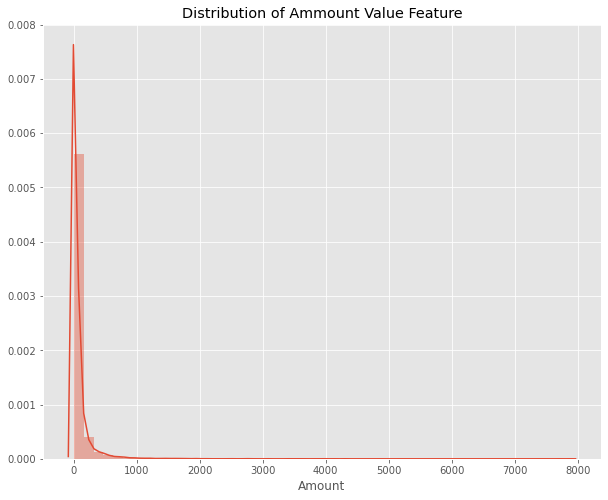

In [15]:
#visualization of amount feature

plt.figure(figsize=(10,8))
plt.title('Distribution of Ammount Value Feature')
sns.distplot(df.Amount)

<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time'>

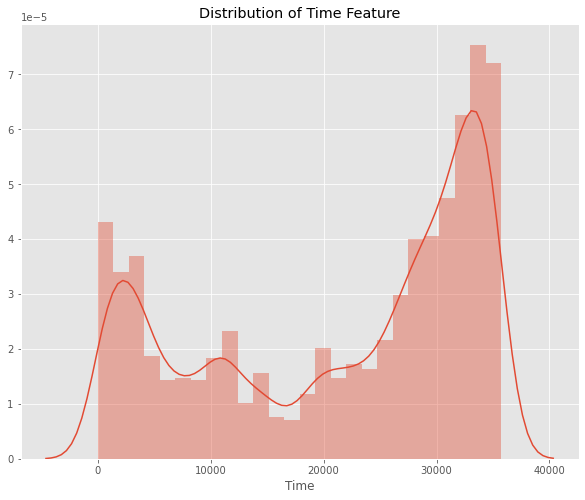

In [16]:
#visualization of time feature

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

Initial analysis of class vaiable (1: Fraud, 0: Not-Fraud)

In [25]:
#fraud and not-fraud transactions 

counts = df.Class.value_counts()
not_fraud = counts[0]
fraud = counts[1]

not_fraud_perc = (not_fraud / (not_fraud + fraud)) * 100
fraud_perc = (fraud / (not_fraud + fraud)) * 100

print ('NOT-Fraud transactions: {}\t({:.2f}%)'.format(not_fraud, not_fraud_perc))
print ('Fraud transactions    : {}\t({:.2f}%)'.format(fraud, fraud_perc))

NOT-Fraud transactions: 29906	(99.69%)
Fraud transactions    : 94	(0.31%)


Text(0.5, 0, 'Class (0:Not-Fraud, 1:Fraud)')

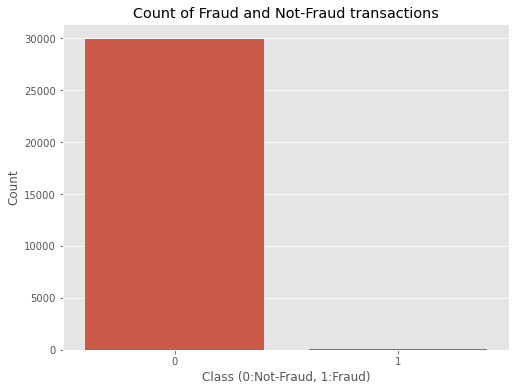

In [27]:
#visualizing not-fraud an fraud transactions

plt.figure(figsize = (8,6))
sns.barplot(x = counts.index, y = counts)

plt.title('Count of Fraud and Not-Fraud transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Not-Fraud, 1:Fraud)')

Let us check the correlation between variables using heatmap.

Text(0.5, 1.0, 'Heatmap of Correlation')

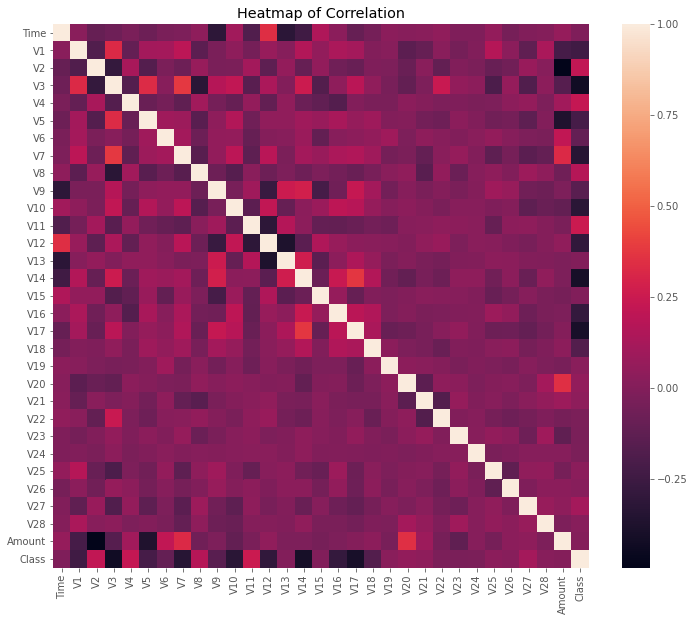

In [29]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

As expected, some features are correlated with the [Class] variable. 

There are relatively little significant correlations for such a big number of variablesmost probably because huge [Class] imbalance distorts the importance of certain correlations with regards to our [Class] variable.

#Methodology

We will start with data preparation in a way to scale the [Time] and [Ammount] features in order to avoid bias in machine learning models. Initially, we have confirmed that there are no missing values (that is the way the sample was prepared). 

Using the original data set would not provide required prediction strenght. Since >99% of transactions are [NOT-FRAUD], a trivial algorithm that always predicts that the transaction is [NOT-FRAUD] would have an accuracy higher than 99%!

To create our balanced training data set, we will take all of the fraudulent transactions in our data set and count them. Then, we will randomly selected the ~same number of non-fraudulent transactions and concatenate the two. After shuffling this newly created data set, visualization will show how new data set looks like.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [33]:
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [47]:
#generating new df by adding scaled time and amount and removing original values 

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.313255,-1.784515
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346564,-1.784515
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.341805,-1.784432
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.195958,-1.784432
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.044340,-1.784349


In [49]:
#splitind data into train and test subset

mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}'.format(train.shape))
print('Test Shape : {}'.format(test.shape))

Train Shape: (26971, 31)
Test Shape : (3029, 31)


In [50]:
#reseting the index
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [58]:
#we need to create subsample of balanced dataset (class distribution)
no_of_frauds = train.Class.value_counts()[1]
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

selected = non_fraud.sample(no_of_frauds)

#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

subsample = pd.concat([selected, fraud])

#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)


Text(0.5, 0, 'Class (0:Not-Fraud, 1:Fraud)')

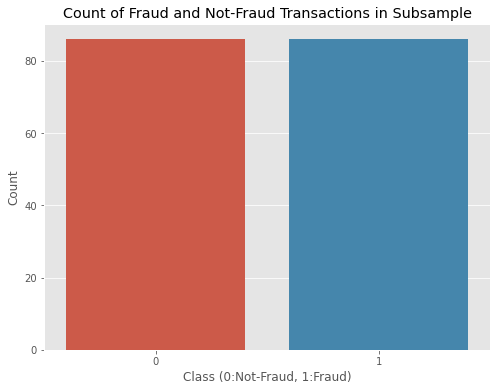

In [62]:
#let us check how it looks like visually

new_counts = subsample.Class.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x = new_counts.index, y = new_counts)
plt.title('Count of Fraud and Not-Fraud Transactions in Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Not-Fraud, 1:Fraud)')

In [63]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]

In [64]:
#looking at the variables with high positive...
corr[corr.Class > 0.5]


,Class
V2,0.644066
V4,0.789423
V11,0.739809
Class,1.000000


In [65]:
#... and high negative correlation
corr[corr.Class < -0.5]

,Class
V3,-0.644839
V6,-0.626027
V7,-0.577735
V9,-0.688199
V10,-0.718087
V12,-0.755268
V14,-0.783015
V16,-0.678576
V17,-0.650202
V18,-0.578167


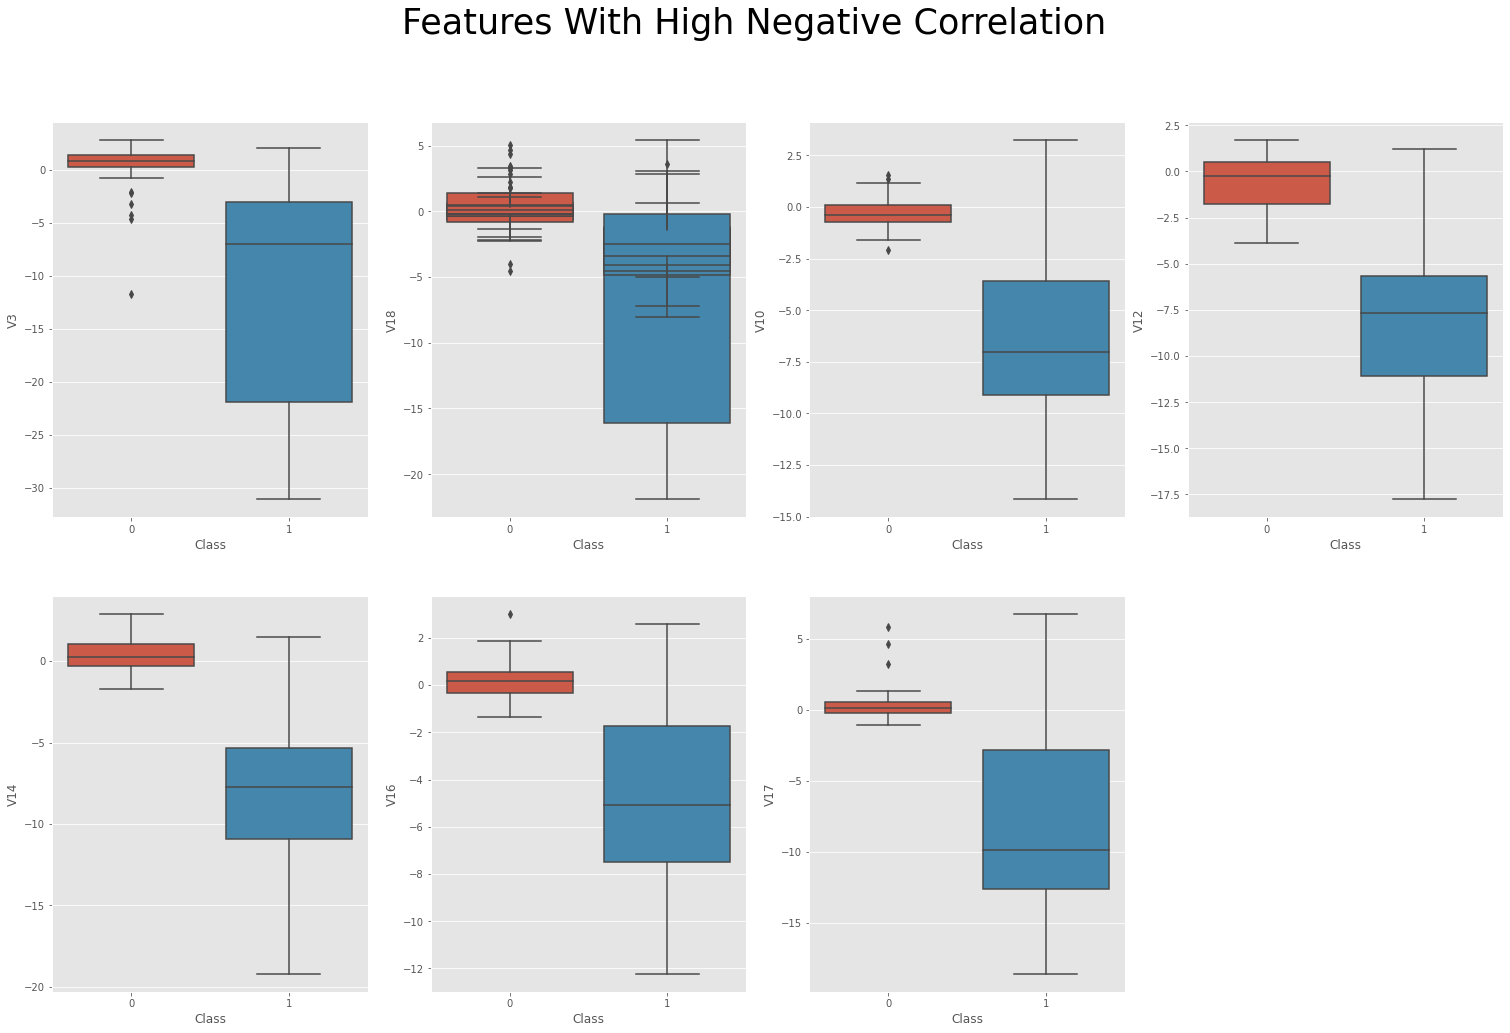

In [66]:
#visualizing the variables with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V6", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V7", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
sns.boxplot(x="Class", y="V18", data=subsample, ax=axes[0,1])

f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

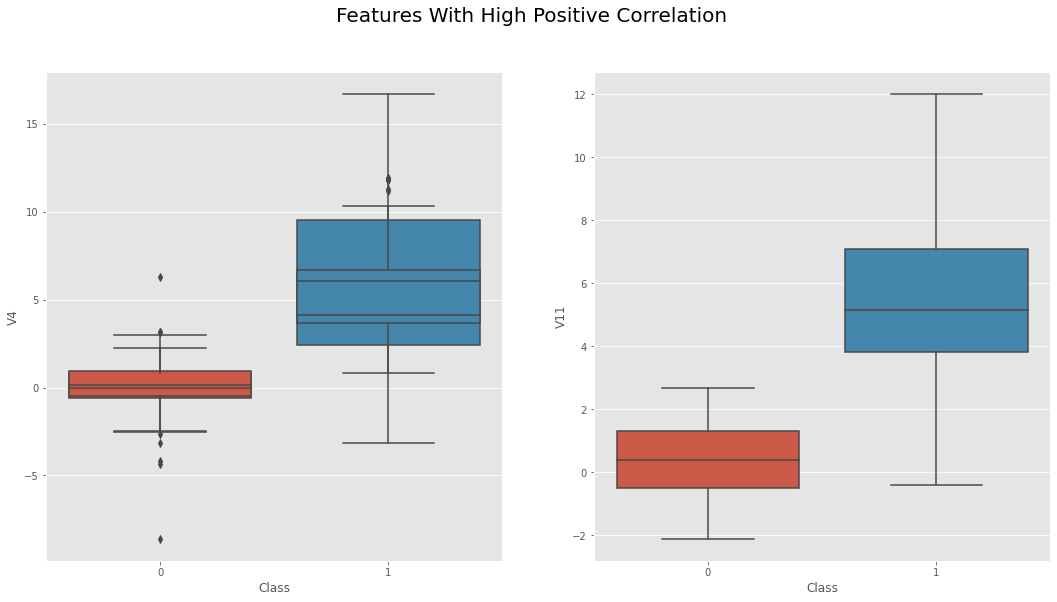

In [67]:
#visualizing the variables with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V2", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [69]:
#Only removing extreme outliers (trying with factor 1.5 reduced the data set significantly)
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [73]:
len_after = len(df2)
len_before = len(subsample)
len_diff = len(subsample) - len(df2)
print('Dataset total transactions: {}'.format(len_before))
print('Removed transactions      : {}'.format(len_diff))
print('Dataset after transaction : {}'.format(len_after))


Dataset total transactions: 172
Removed transactions      : 58
Dataset after transaction : 114


There are algorithms that could be used for reduction of sample size in order to show the dependability and correlation for high-dimension dataset. One of them is t-SNE and I am copying the code for basic usage of that algorithm.

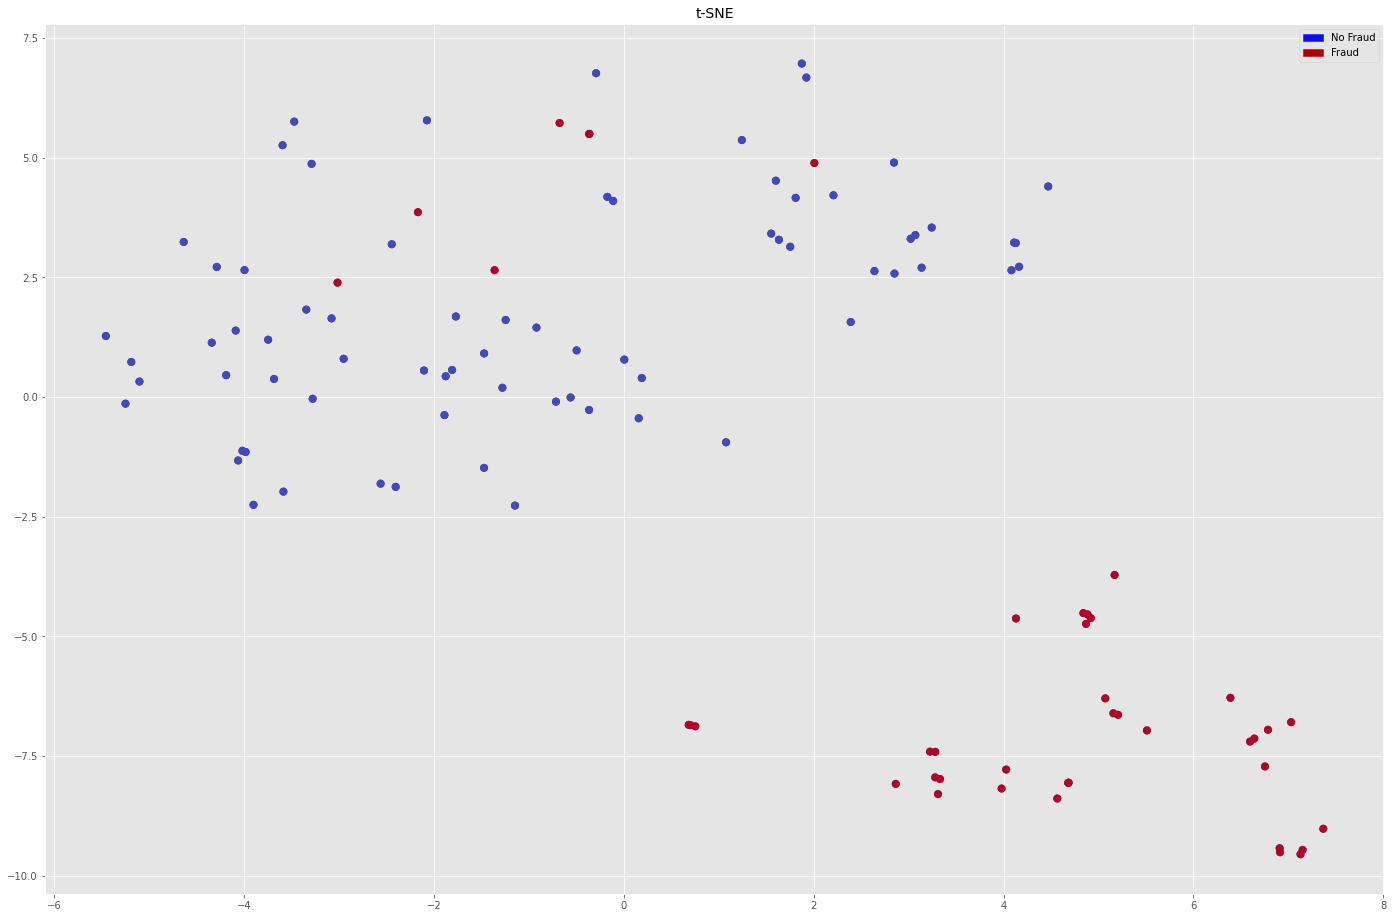

In [74]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# t-SNE scatter plot 
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

#Results

##Now into classification 

To be able to test the performance of our algorithms, we will first perform the 80/20 train-test split. To prevent overfitting, we can use resampling with of k-fold cross-validation:
- splitting training data into k parts (folds)
- fit the model on k-1 folds before making predictions for the kth fold
- repeat this process for every single fold and average the resulting predictions

Classification algorithms:
- Logistic Regression
- Linear Discriminant Analysis
- K Nearest Neighbors (KNN)
- Classification Trees
- Support Vector Classifier
- Random Forest Classifier
- XGBoost Classifier (will not be used since there is a problem with importing library)



In [75]:
#just a helper

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [87]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#once again, 42 will be answer to Life, the Universe, and Everything...

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
### I had some problems importing XGB

In [89]:
models = []

models.append(('LR  ', LogisticRegression()))
models.append(('LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN ', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM ', SVC()))
#models.append(('XGB', XGBClassifier()))
models.append(('RF  ', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 42)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR  : 0.962222 (0.059876)
LDA : 0.936111 (0.095493)
KNN : 0.957500 (0.086639)
CART: 0.823274 (0.115899)
SVM : 0.967778 (0.070000)
RF  : 0.962778 (0.076176)


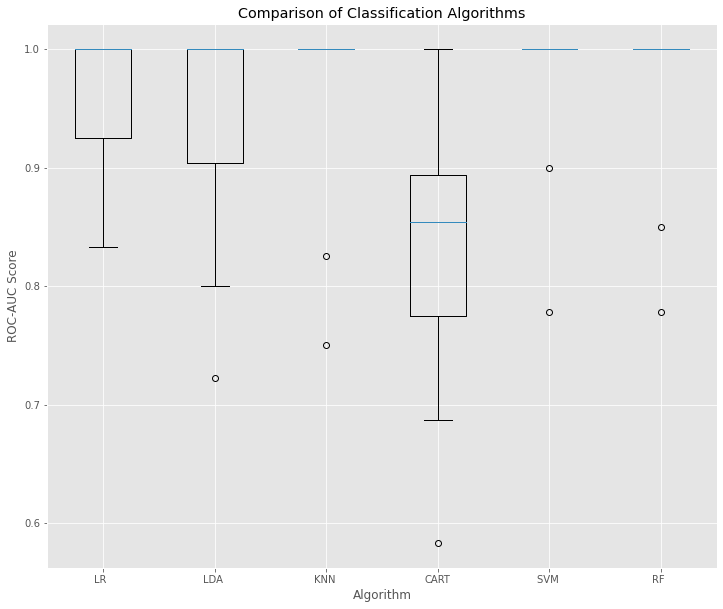

In [90]:
#Compare Algorithms

fig = plt.figure(figsize = (12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

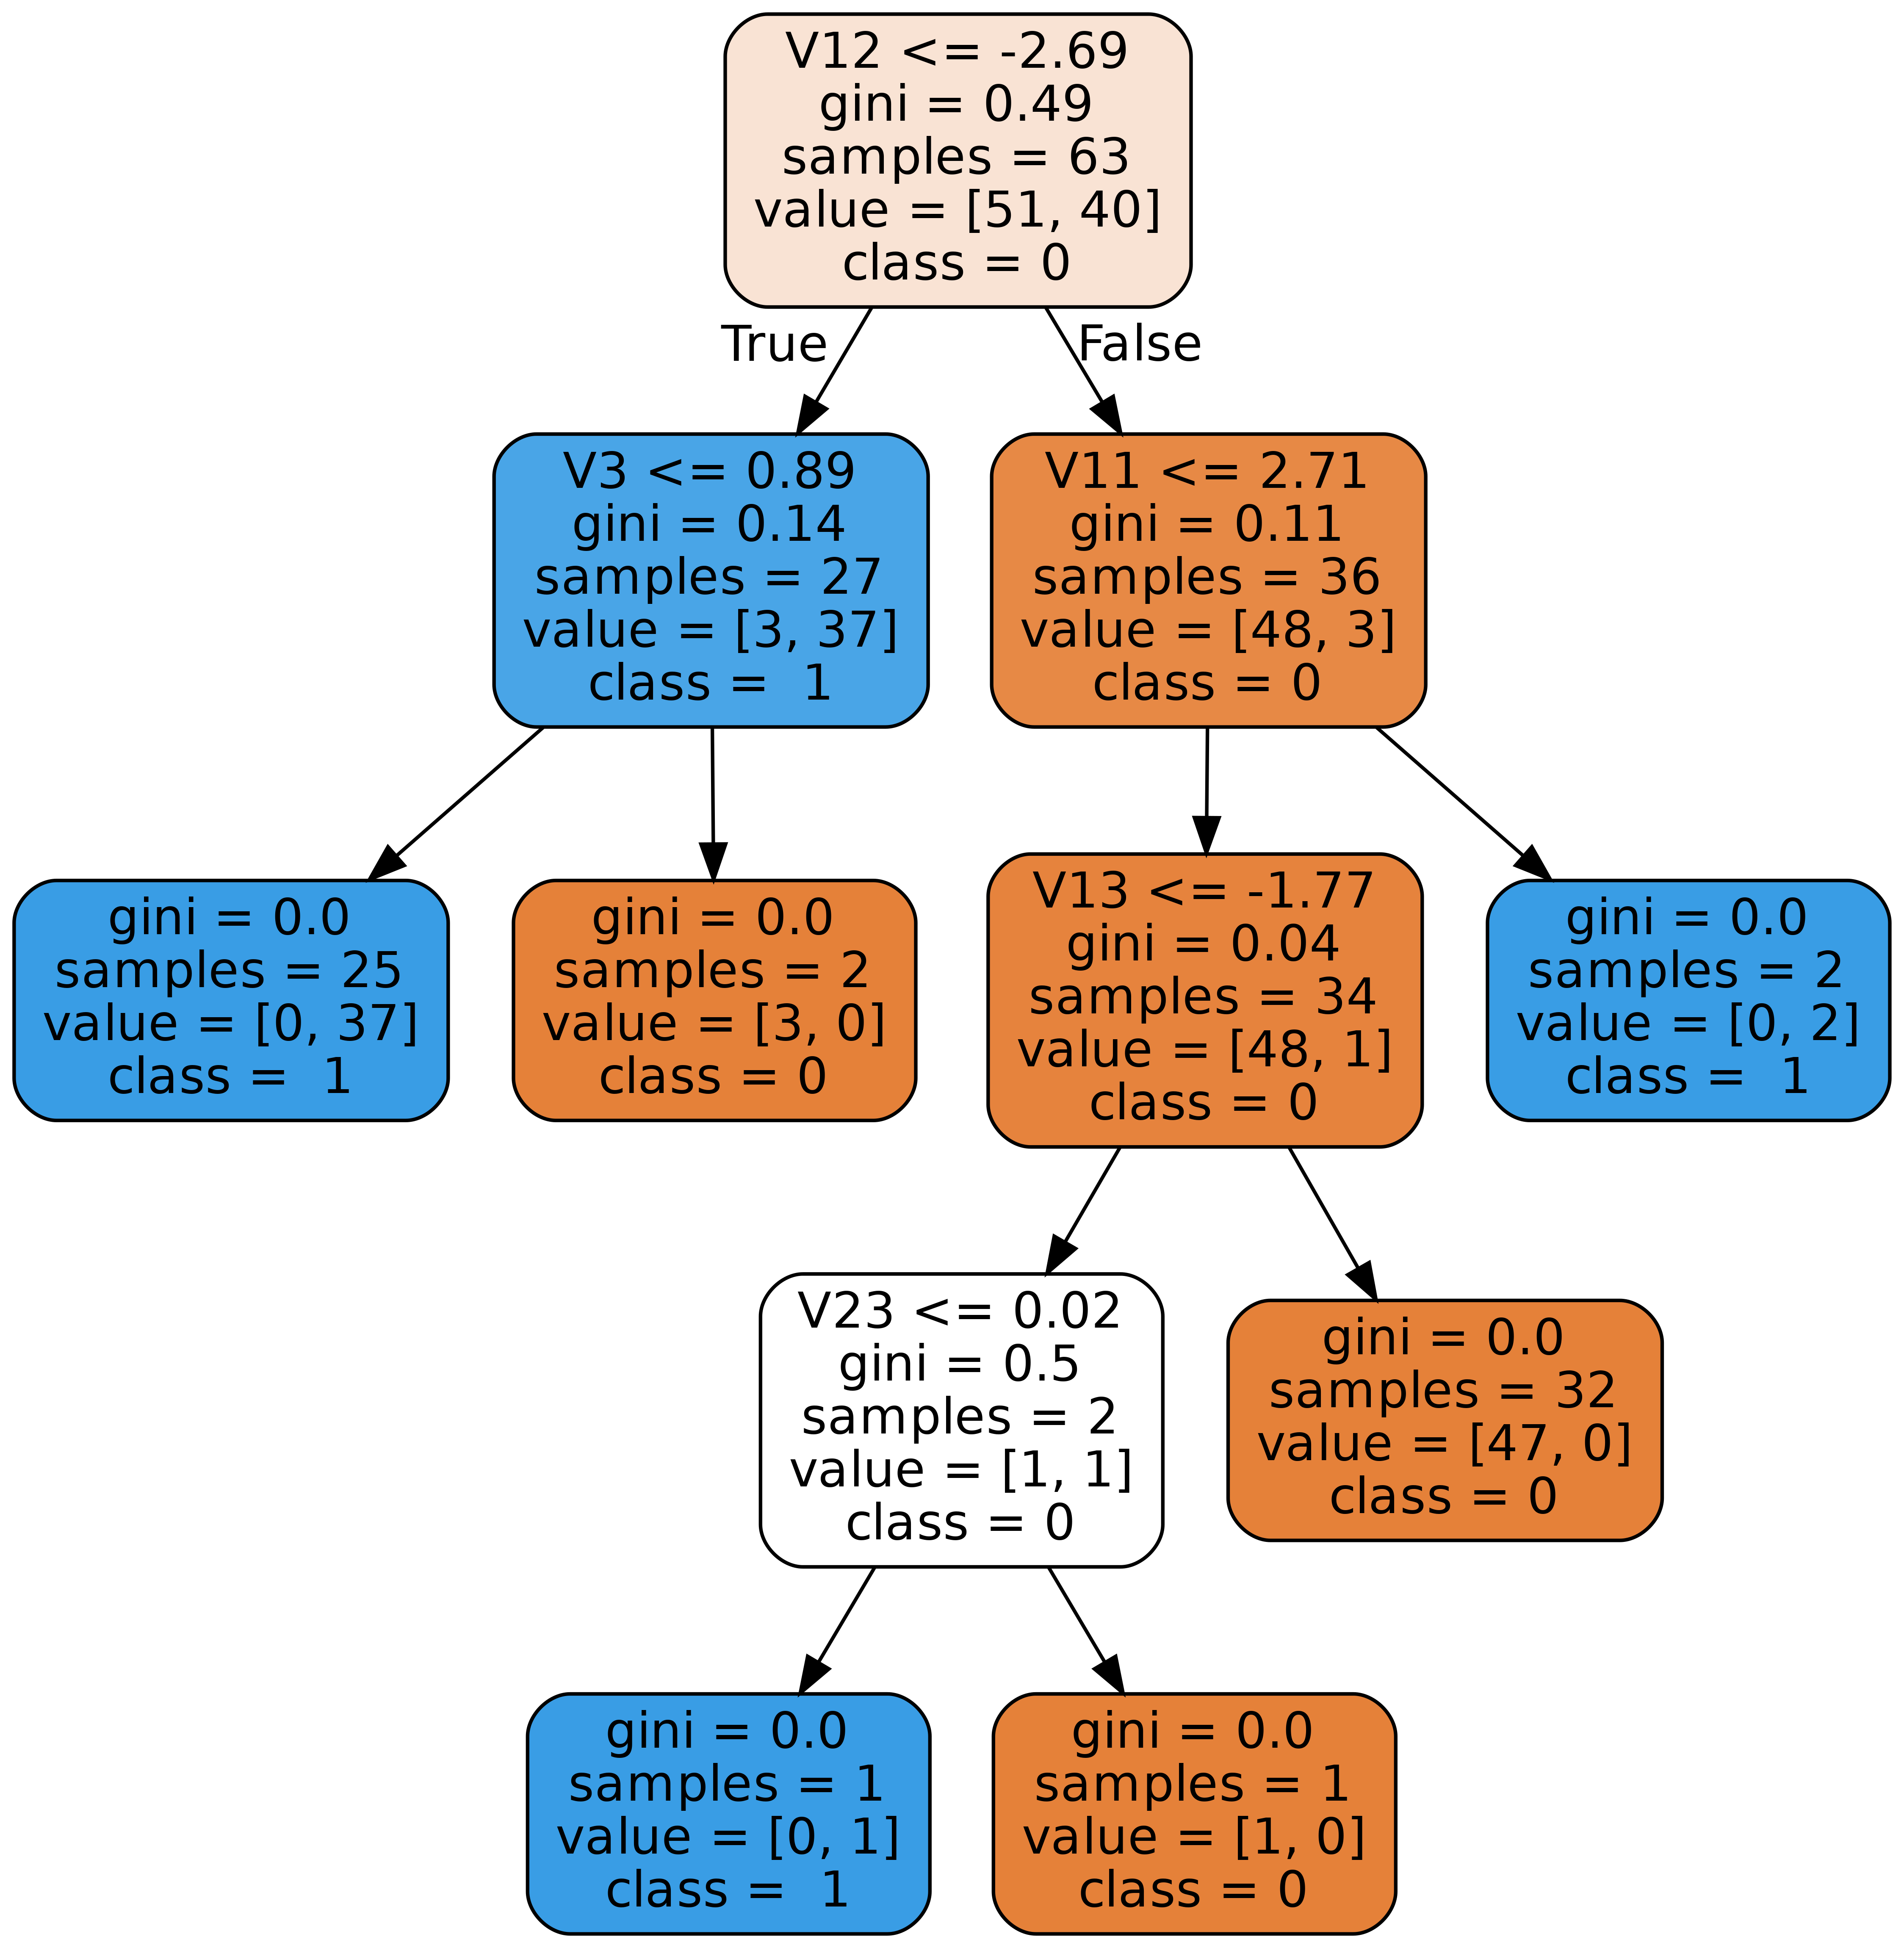

In [91]:
#visualizing RF
model = RandomForestClassifier(n_estimators = 10)

# Train
model.fit(X_train, y_train)
 
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file = 'tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#Discussion

It seems there is a difference in algorithm performance. From the sample available, it is not fully clear wheater the RF should be best option to proceed with (as might be the first choice in pre-analysis [when tried with significantly bigger data-set on local machine]).

I have added the decisson tree as an addition to random forest.

#Conclusion

Credid Card Fraud detection has confirmed to be very complex issue that requires a substantial amount of planning, data preparation, cleansing and sclaing the data, bringin down the highly unbalanced dat to balanced set.

In case of non-anonymized features available, we could make further analysis in regards the most important features in creating fraud case.

Future work will include a comprehensive tuning of the Random Forest algorithm and, potentially, much higher data set. 
